<a href="https://colab.research.google.com/github/Anubhav1107/First_One/blob/master/kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import random as rd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [0]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs





import warnings
warnings.filterwarnings("ignore")

In [24]:
data = files.upload()

Saving shops.csv to shops (2).csv


In [0]:
import io
df2 = pd.read_csv(io.BytesIO(data['shops.csv']))

In [26]:
df2.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [85]:
df2.describe()

df1 = files.upload()

Saving item_categories.csv to item_categories.csv


In [28]:
data2 = files.upload()

Saving items.csv to items.csv


In [89]:
import io
items = pd.read_csv(io.BytesIO(data2['items.csv']))

item_cat = pd.read_csv(io.BytesIO(df1['item_categories.csv']))

item_cat.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [31]:
df3.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [33]:
df3.describe()

,item_id,item_category_id
count,22170.00000,22170.000000
mean,11084.50000,46.290753
std,6400.07207,15.941486
min,0.00000,0.000000
25%,5542.25000,37.000000
50%,11084.50000,40.000000
75%,16626.75000,58.000000
max,22169.00000,83.000000


In [35]:
data4 = files.upload()

Saving sample_submission.csv.gz to sample_submission.csv.gz


In [0]:
with gzip.open('sample_submission.csv.gz') as f:
  feat = pd.read_csv(f)


In [59]:
feat.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [55]:
data5 = files.upload()

Saving sales_train.csv.gz to sales_train.csv.gz


In [0]:
with gzip.open('sales_train.csv.gz') as f:
  scale = pd.read_csv(f)

In [58]:
feat2.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [62]:
filo = files.upload()

Saving test.csv.gz to test.csv.gz


In [0]:
with gzip.open('test.csv.gz') as f:
  fiel = pd.read_csv(f)

In [64]:
fiel.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [65]:
fiel.describe()

,ID,shop_id,item_id
count,214200.000000,214200.000000,214200.000000
mean,107099.500000,31.642857,11019.398627
std,61834.358168,17.561933,6252.644590
min,0.000000,2.000000,30.000000
25%,53549.750000,16.000000,5381.500000
50%,107099.500000,34.500000,11203.000000
75%,160649.250000,47.000000,16071.500000
max,214199.000000,59.000000,22167.000000


In [0]:
scale.date = scale.date.apply(lambda x:datetime.datetime.strptime(x, '%d.%m.%Y'))

In [72]:
scale.date.head()

0   2013-01-02
1   2013-01-03
2   2013-01-05
3   2013-01-06
4   2013-01-15
Name: date, dtype: datetime64[ns]

In [75]:
print(scale.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              datetime64[ns]
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 134.4 MB
None


In [0]:
#Aggregate to monthly level the required metrics

monthly_sales = scale.groupby(["date_block_num", "shop_id", "item_id"])["date", "item_price", "item_cnt_day"].agg({"date":["min", "max"], "item_price":"mean", "item_cnt_day":"sum"})

#monthly_sales = scale.groupby(['date_block_num', "shop_id", "item_id"])["date", "item_price", "item_cnt_day"].agg({"date"})



## lets breake the line of code here 
# aggregate by date_block, shop_id and item_id
# select the column date, item_price and item_cnt(sales)
# provide a dictiondary to clarify which aggregation to perform in which column
# min and max on the date

#  average of the item_price
#  sum of the sales

In [83]:
monthly_sales.head(20)

date            item_price item_cnt_day
                                      min        max       mean          sum
date_block_num shop_id item_id                                              
0              0       32      2013-01-03 2013-01-31      221.0          6.0
                       33      2013-01-03 2013-01-28      347.0          3.0
                       35      2013-01-31 2013-01-31      247.0          1.0
                       43      2013-01-31 2013-01-31      221.0          1.0
                       51      2013-01-13 2013-01-31      128.5          2.0
                       61      2013-01-10 2013-01-10      195.0          1.0
                       75      2013-01-17 2013-01-17       76.0          1.0
                       88      2013-01-16 2013-01-16       76.0          1.0
                       95      2013-01-06 2013-01-06      193.0          1.0
                       96      2013-01-10 2013-01-10       70.0          1.0
                       98      2013-01-04 2013-01-31      268.0         25.0
                       111     2013-01-17 2013-01-17       89.0          1.0
                       149     2013-01-11 2013-01-28       99.0          3.0
                       151     2013-01-16 2013-01-16       75.0          1.0
                       153     2013-01-09 2013-01-09      258.0          1.0
                       198     2013-01-10 2013-01-10      112.0          1.0
                       210     2013-01-05 2013-01-25      118.0          2.0
                       282     2013-01-04 2013-01-04      109.0          1.0
                       306     2013-01-22 2013-01-22       59.0          1.0
                       351     2013-01-21 2013-01-21       89.0          1.0

In [96]:
# number of items per category

x = items.groupby(['item_category_id']).count()
x

,item_name,item_id
item_category_id,,
0,4,4
1,2,2
2,75,75
3,34,34
4,15,15
5,29,29
6,40,40
7,24,24
8,9,9


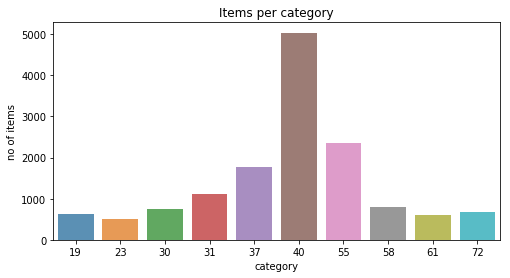

In [95]:
x = x.sort_values(by='item_id', ascending=False)
x = x.iloc[0:10].reset_index()
x
# #plot

plt.figure(figsize=(8,4))
ax = sns.barplot(x.item_category_id, x.item_id, alpha=0.8)
plt.title("Items per category")
plt.ylabel("no of items")
plt.xlabel("category")
plt.show()